In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Load the dataset
dataf = pd.read_csv('heart.csv')
dataf.head
dataf.shape

(303, 14)

Confusion Matrix :
 [[25  5]
 [ 5 26]]

 Fold classification accuracy               precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.84      0.84      0.84        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


 Accuracy Score 0.8360655737704918
Confusion Matrix :
 [[17  8]
 [ 6 30]]

 Fold classification accuracy               precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.79      0.83      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61


 Accuracy Score 0.7704918032786885
Confusion Matrix :
 [[21 12]
 [ 4 24]]

 Fold classification accuracy               precision    recall  f1-score   support

         

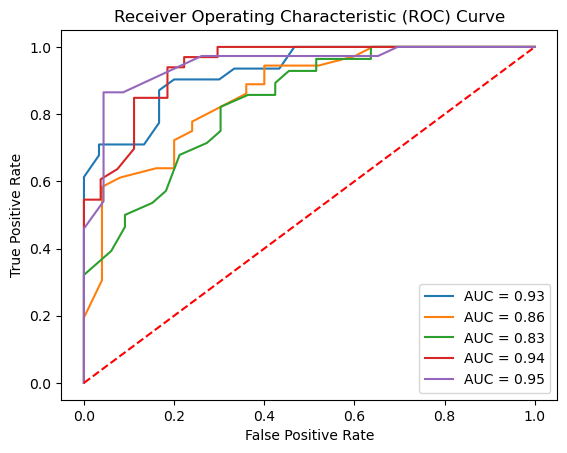

In [5]:


# Split the dataset into features (X) and labels (y)
X = dataf.iloc[:,0:13].values
y = dataf.iloc[:,13].values

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

# Train a random forest classifier using k-fold cross-validation
for train_index, test_index in kf.split(X):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    classifier = RandomForestClassifier(n_estimators=45)
    classifier.fit(Xtrain, ytrain)

    # Make predictions on the testing set
    y_pred = classifier.predict(Xtest)

    # Compute the confusion matrix, classification report, and accuracy score
    confusion_matx = confusion_matrix(ytest, y_pred)
    fold_acc = classification_report(ytest, y_pred)
    acc_score = accuracy_score(ytest, y_pred)
    
    print("Confusion Matrix :\n",confusion_matx)
    print("\n Fold classification accuracy",fold_acc)
    print("\n Accuracy Score",acc_score)

    # Compute the ROC curve and AUC score
    y_prob = classifier.predict_proba(Xtest)[:, 1]
    fpr, tpr, thresholds = roc_curve(ytest, y_prob)
    auc = roc_auc_score(ytest, y_prob)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

# Format and display the ROC curve plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
